## X Education-Lead Score Case Study_Logistic Regression

Business Case: X Education that provides online educational courses to industry professionals. It uses several websites and search engines like Google to advertise and pitch its programs.In this process, it collects basic demographics information of the users who search for online programs.These customers are potential online leads for X Education.Past referrals is another source of acquisition leads for X Education. The business's Sales team then tries to convert these leads by means of calling, emails etc. The at-present conversion rate of these leads for X Education is 30%. Hence, the company intends to identify the most potential leads known as 'Hot Leads' and filter them at the earliest phase of lead generation.

Approach: Building a Classification model by using Logistic Regression method and assign a lead score of 0-100 to a customer demographic data of around 9000 leads as obtained by X Education. Customers with a high lead score are expected to have higher conversion rate. The model is expected to increase X Education's target lead conversion rate from 30% to a minimum 80%.    

## Steps Involved:
1.  Data Import
2.  Data Pre-Processing
2.1 Null Value Treatment
2.2 & 2.4 Dropping columns
2.3 Evaluating column variable skewness
2.5 Data Imputation
3.  EDA
3.1 Univariate Analysis- Outlier Treatment, & Behavioral visualization of Categorical Data
3.2 Bivariate Analysis 
4.  Creating Dummy Variables
5.  Divide data into Train set and Test set
6.  Feature Scaling
8.  Data Visualization
8.  Model Building
9.  Feature selection using RFE
10. Confusion Matrix to verify accuracy of prediction
11. Manual Feature Elimination using VIF 
12. Metrics to confirm goodness of the model by verifying metrics beyond accuracy: Sensitivity & Specificity
13. Plotting ROC Curve
14. Finding Optimal Cutoff Point
15. Precision
16. Recall
17. Treating the model on the test set 

### Step1. Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
leads=pd.read_csv(r"Leads.csv",sep=',')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
round(100*(leads.isnull().sum()/len(leads.index)),0)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

### Step2. Data Pre-Processing

##### 2.1 Handling missing values.Assigning np.NaN to missing values

In [7]:
#Converting datapoints with data value of 'Select' in categorical columns into np.NaN.
#This implies that these values shall be considered as missing values
leads=leads.replace('Select',np.nan)

In [8]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### 2.2 Dropping Columns

###### Dropping columns with same information available with other column in the data 

In [9]:
leads.drop(['Prospect ID'], 1, inplace = True)

In [10]:
#Check for null values
leads.isnull().sum()
#Checking % of null values
round(100*(leads.isnull().sum()/len(leads.index)),0)

Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

###### Dropping columns with missing values >=40%

In [11]:
leads=leads.drop(['How did you hear about X Education','Lead Quality','Lead Profile','City','Asymmetrique Activity Index',
                  'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [12]:
#Checking % of null values post dropping columns with >=40% missing values
round(100*(leads.isnull().sum()/len(leads.index)),0)

Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

##### 2.3 Evaluating skewness of remaining categorical columns 

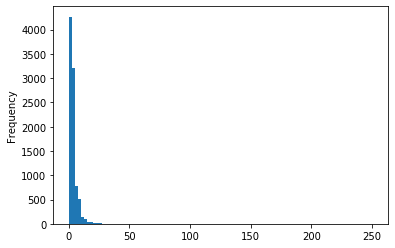

In [16]:
leads['TotalVisits'].plot(kind='hist',bins=100)


In [23]:
leads['TotalVisits'].describe()
#leads['TotalVisits'].kurtosis()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

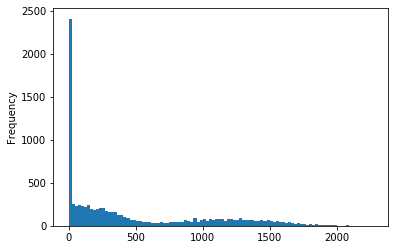

In [25]:
leads['Total Time Spent on Website'].plot(kind='hist',bins=100)
leads['Total Time Spent on Website'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

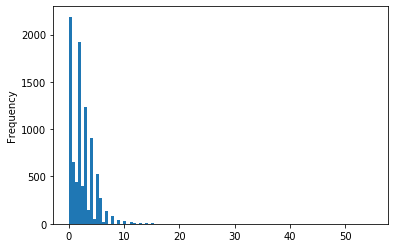

In [26]:
leads['Page Views Per Visit'].plot(kind='hist',bins=100)
leads['Page Views Per Visit'].describe()

In [13]:
leads.loc[:, leads.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
leads.skew(axis=0,skipna=True)

Lead Number                     0.140451
Converted                       0.471058
TotalVisits                    19.911657
Total Time Spent on Website     0.956450
Page Views Per Visit            2.871793
Asymmetrique Activity Score    -0.383380
Asymmetrique Profile Score      0.221739
dtype: float64

In [14]:
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [15]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
youtubechannel          1
NC_EDM                  1
WeLearn                 1
welearnblog_Home        1
Pay per Click Ads       1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

In [16]:
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [17]:
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [18]:
leads['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [19]:
leads['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [20]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [21]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [22]:
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [23]:
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [24]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [25]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [26]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [27]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [28]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [29]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [30]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [31]:
#Dropping columns with single data value
leads=leads.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

##### 2.4 Dropping columns that are score variables and are created by the Sales team of X Education for customer profiling

In [32]:
# Dropping columns that are score variables
leads=leads.drop(['Tags','Last Notable Activity'],axis=1)

In [33]:
#Checking % of null values post dropping columns with >=40% missing values, columns with skewed categorical variables,
#& score variables
round(100*(leads.isnull().sum()/len(leads.index)),0)

Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
A free copy of Mastering The Interview            0.0
dtype: float64

##### 2.5 Data Imputation

##### Since there are columns with substantial % of missing values, NaN values should be replaced with an appropriate common value.These columns are:
'Country','Specialization','What is your current occupation','What matters most to you in choosing a course'

###### Imputing column 'Country'

In [34]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
South Africa               4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
Netherlands                2
Bangladesh                 2
Asia/Pacific Region        2
Ghana                      2
Uganda                     2
Belgium                    2
Italy                      2
China                      2
Philippines                2
Denmark                    1
Sri Lanka                  1
Indonesia                  1
Tanzania                   1
Malaysia                   1
Liberia       

In [35]:
#Replacing NaN values with 'No Input Selected'
leads['Country']=leads['Country'].replace(np.NaN,'No Input Selected')

In [36]:
#Grouping non-Indian countries with low frequency under 'Outside India' for the column 'Country'
group=leads['Country'].value_counts().index[:2]
leads['Country']=np.where(leads['Country'].isin(group),leads['Country'],'Outside India')

In [37]:
#Imputing values with 'No Input Selected' with 'India' as this is a categorical variable and 'Mode' can be an optimum imputation
leads['Country']=leads['Country'].replace(['India','No Input Selected'],'India')

In [38]:
leads['Country'].value_counts(dropna=False)

India            8953
Outside India     287
Name: Country, dtype: int64

In [39]:
round(leads['Country'].value_counts(normalize=True)*100,0)

India            97.0
Outside India     3.0
Name: Country, dtype: float64

###### Imputing column 'Specialization'

In [40]:
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [41]:
#Replacing NaN values with 'No Input Selected'
leads['Specialization']=leads['Specialization'].replace(np.NaN,'No Input Selected')

In [42]:
round(leads['Specialization'].value_counts(normalize=True)*100,0)

No Input Selected                    37.0
Finance Management                   11.0
Human Resource Management             9.0
Marketing Management                  9.0
Operations Management                 5.0
Business Administration               4.0
IT Projects Management                4.0
Supply Chain Management               4.0
Banking, Investment And Insurance     4.0
Media and Advertising                 2.0
Travel and Tourism                    2.0
International Business                2.0
Healthcare Management                 2.0
Hospitality Management                1.0
E-COMMERCE                            1.0
Retail Management                     1.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   0.0
Name: Specialization, dtype: float64

In [43]:
#Grouping similar or related work areas 
leads['Specialization']=leads['Specialization'].replace(['Finance Management','Banking, Investment And Insurance','Healthcare Management','Rural and Agribusiness'],'Banking/Finance/Rural&Healthcare')
leads['Specialization']=leads['Specialization'].replace(['Human Resource Management','Operations Management',
                                                         'IT Projects Management','Services Excellence','Marketing Management','Media and Advertising','E-COMMERCE','E-Business'],'HR/Ops/Mktg/IT-Projects')
leads['Specialization']=leads['Specialization'].replace(['Business Administration','International Business','Supply Chain Management','Retail Management','Travel and Tourism','Hospitality Management','No Input Selected'],'Others')



In [44]:
leads['Specialization'].value_counts(dropna=False)

Others                              4727
HR/Ops/Mktg/IT-Projects             2967
Banking/Finance/Rural&Healthcare    1546
Name: Specialization, dtype: int64

In [45]:
round(leads['Specialization'].value_counts(normalize=True)*100,0)

Others                              51.0
HR/Ops/Mktg/IT-Projects             32.0
Banking/Finance/Rural&Healthcare    17.0
Name: Specialization, dtype: float64

###### Imputing column 'What is your current occupation'

In [46]:
#Renaming the column
leads=leads.rename(columns={'What is your current occupation':'Current Occupation'})

In [47]:
round(leads['Current Occupation'].value_counts(normalize=True)*100,0)

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: Current Occupation, dtype: float64

In [48]:
#Replacing NaN values with 'No Input Selected'
leads['Current Occupation']=leads['Current Occupation'].replace(np.NaN,'No Input Selected')

In [49]:
round(leads['Current Occupation'].value_counts(normalize=True)*100,0)

Unemployed              61.0
No Input Selected       29.0
Working Professional     8.0
Student                  2.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: Current Occupation, dtype: float64

In [50]:
#Grouping varaibles based on availability of income source
leads['Current Occupation']=leads['Current Occupation'].replace(['Unemployed','Student','Housewife','Other','No Input Selected'],'Unemployed')
leads['Current Occupation']=leads['Current Occupation'].replace(['Working Professional','Businessman'],'Salaried/Self Employed')

In [51]:
round(leads['Current Occupation'].value_counts(normalize=True)*100,0)

Unemployed                92.0
Salaried/Self Employed     8.0
Name: Current Occupation, dtype: float64

###### Imputing column 'What matters most to you in choosing a course'

In [52]:
#Renaming the column
leads=leads.rename(columns={'What matters most to you in choosing a course':'Course Selection Reason'})

In [53]:
leads['Course Selection Reason'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: Course Selection Reason, dtype: int64

In [54]:
#Replacing NaN values with 'No Input Selected'
leads['Course Selection Reason']=leads['Course Selection Reason'].replace(np.NaN,'No Input Selected')

In [55]:
#Grouping varaibles based on availability of income source
leads['Course Selection Reason']=leads['Course Selection Reason'].replace(['No Input Selected','Flexibility & Convenience','Other'],'No Input Selected')

In [56]:
leads['Course Selection Reason'].value_counts(dropna=False)

Better Career Prospects    6528
No Input Selected          2712
Name: Course Selection Reason, dtype: int64

In [57]:
#Checking % of null values post dropping columns & imputing missing values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
Current Occupation                        0.00
Course Selection Reason                   0.00
A free copy of Mastering The Interview    0.00
dtype: float64

##### 2.6 Evaluating % of missing values and dropping rows having low % of null values.

In [58]:
# Evaluating data loss if rows with missng values are removed
round(100*(sum(leads.isnull().sum(axis=1) > 1)/leads.shape[0]),2)

1.48

In [59]:
#Almost 98% of the data shall be retained post dropping rows with low % of null values  
leads=leads.dropna()

In [60]:
leads.shape

(9074, 14)

In [61]:
#Checking % of null values post dropping columns & imputing missing values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
Current Occupation                        0.0
Course Selection Reason                   0.0
A free copy of Mastering The Interview    0.0
dtype: float64

### Step 3. EDA

In [62]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Country                                 9074 non-null   object 
 10  Specialization                          9074 non-null   obje

#### 3.1 Univariate Analysis

##### Outlier Treatment

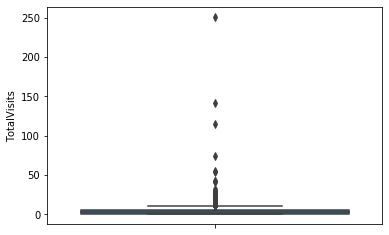

In [63]:
#Visualizing distribution of variables for Total Visits
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

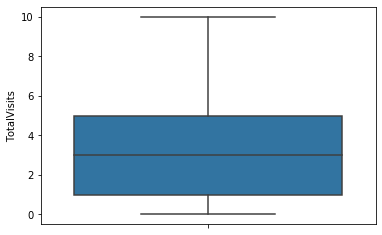

In [64]:
#capping the outliers either with a soft capping of 1-99 or a mid range capping of 5-95
q4 = leads['TotalVisits'].quantile(0.95)
leads['TotalVisits'][leads['TotalVisits']>= q4] = q4

#Visualizing distribution of variables for Total Visits post capping
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

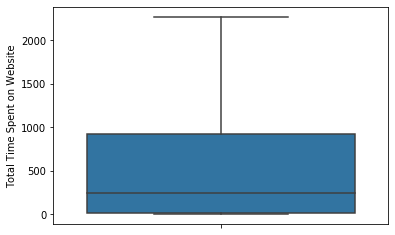

In [65]:
#Visualizing distribution of variables for Total Time Spent on Website
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()
# No outliers detected for this column  

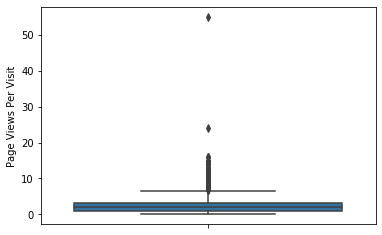

In [66]:
#Visualizing distribution of variables for Page Views Per Visit
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

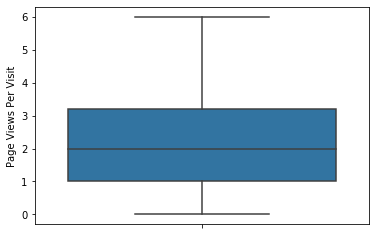

In [67]:
#capping the outliers either with a soft capping of 1-99 or a mid range capping of 5-95
q4 = leads['Page Views Per Visit'].quantile(0.95)
leads['Page Views Per Visit'][leads['Page Views Per Visit']>= q4] = q4

#Visualizing distribution of variables for Page Views Per Visit post capping
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [68]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.191867,482.887481,2.265943
std,23348.029512,0.485053,2.780618,545.256560,1.790991
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,10.000000,2272.000000,6.000000


In [69]:
leads.Converted.value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

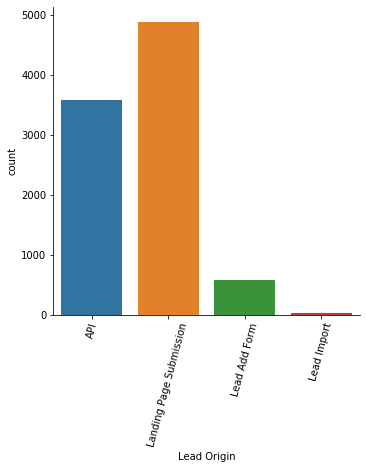

In [70]:
#Behavioral feature of categorical variable 'Lead Origin'
sns.catplot(x='Lead Origin',kind='count', data=leads)
plt.xticks(rotation=75)
plt.show()
# Maximum leads acquired through landing page submissions

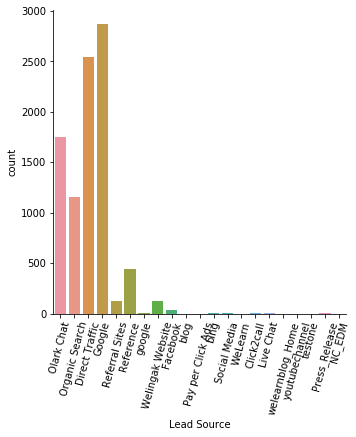

In [71]:
#Behavioral feature of categorical variable 'Lead Origin'
sns.catplot(x='Lead Source',kind='count', data=leads)
plt.xticks(rotation=75)
plt.show()
# Unpaid lead acquisition strategies like organic search is more effective than affiliate marketing, and referral sites

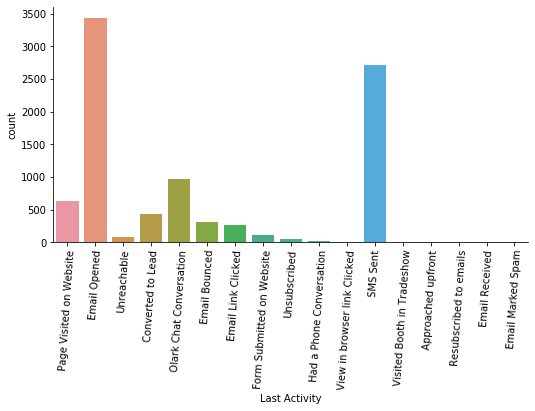

In [72]:
#Behavioral feature of categorical variable 'Last Activity'
sns.catplot(x='Last Activity',kind='count', data=leads,height=4, aspect=2)
plt.xticks(rotation=86)
plt.show()

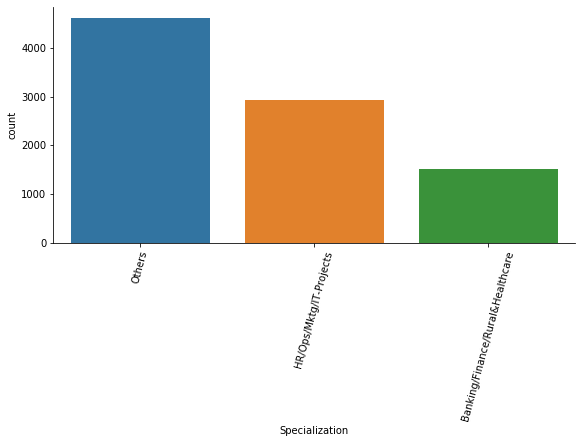

In [73]:
#Behavioral feature of categorical variable 'Specialization'
sns.catplot(x='Specialization',kind='count', data=leads,height=4, aspect=2)
plt.xticks(rotation=75)
plt.show()

#### 3.2 Bivariate Analysis

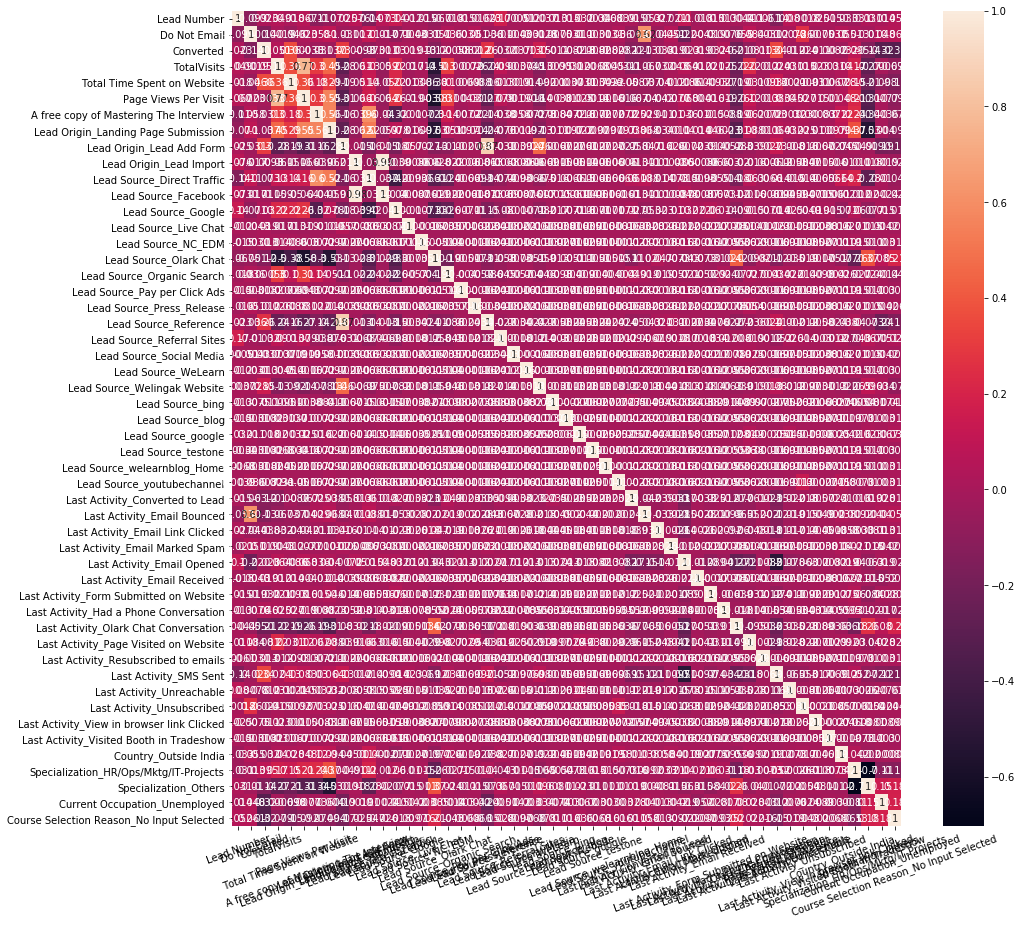

In [184]:
#Correlation matrix to understand relationship between variables 
plt.figure(figsize=(15,15))
sns.heatmap(leads.corr(),annot=True)
plt.xticks(rotation=20)
plt.show()
# The correlation matrix is not intuitive

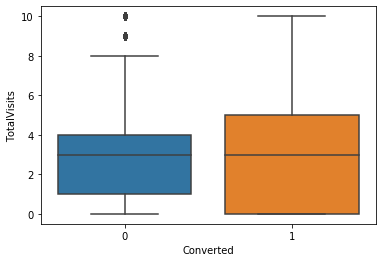

In [75]:
#Distribution of numerical variables with target variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

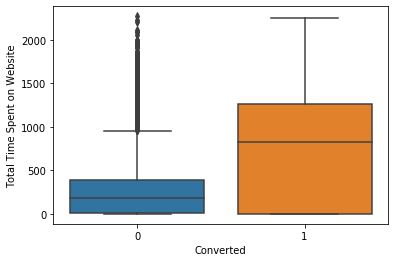

In [76]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()
#Leads that were actually converted spent lesser time on the website as inversely to those that could not be converted

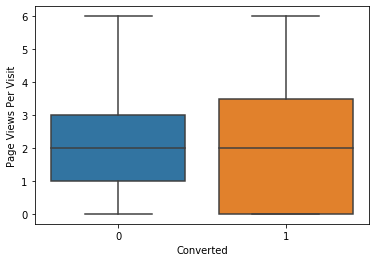

In [77]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

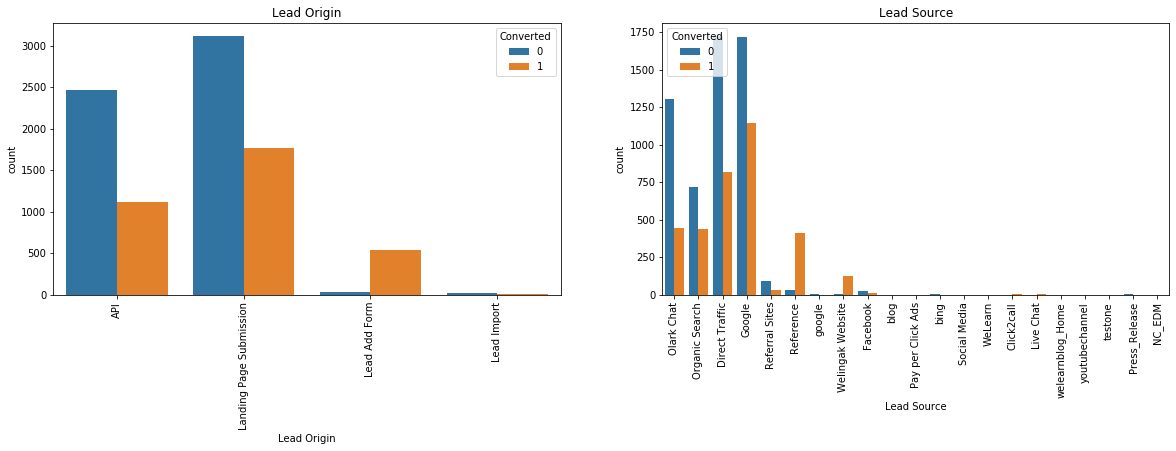

In [78]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

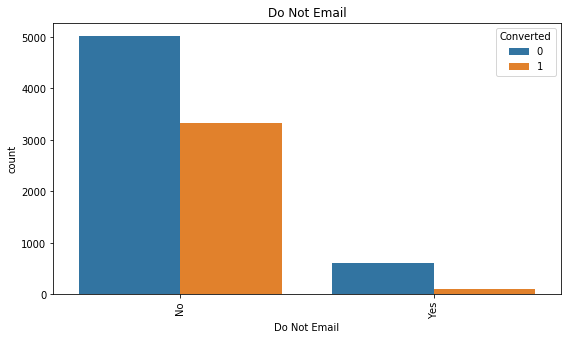

In [79]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.show()
#The graph infers that customer who are determined to enroll to the program do not appreciate email chains

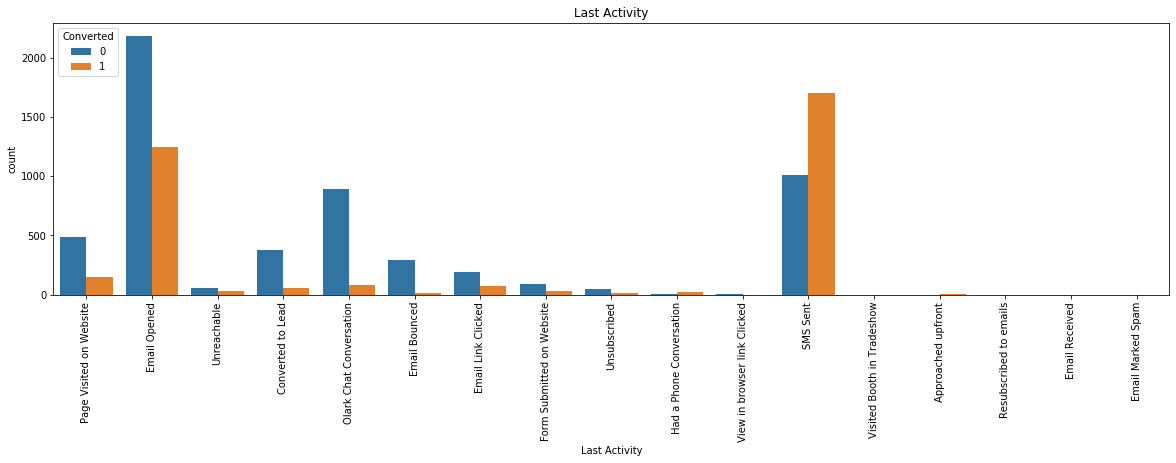

In [80]:
plt.figure(figsize = (20,5))

plt.subplot(1,1,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()

### Step4: Creating Dummy Variables

In [81]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Country                                 9074 non-null   object 
 10  Specialization                          9074 non-null   obje

In [82]:
# List of categorical columns
leads.loc[:,leads.dtypes=='object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'Current Occupation',
       'Course Selection Reason', 'A free copy of Mastering The Interview'],
      dtype='object')

#### 4.1 Converting categorical variables (Yes/No) into binary(1/0) 

In [83]:
# for 'Do Not Email' :-'0'=email No; '1'=Yes to Email.
# for 'A free copy of Mastering The Interview':- '0'=No free copy; '1'=free copy needed.
varlist=['Do Not Email','A free copy of Mastering The Interview']
#defining map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})
#Applying the map function to the master dataframe
leads[varlist]=leads[varlist].apply(binary_map)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current Occupation,Course Selection Reason,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Others,Unemployed,Better Career Prospects,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,HR/Ops/Mktg/IT-Projects,Unemployed,Better Career Prospects,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,0


##### Creating dummy features for categorical variables with multiple levels and drop first dummy feature

In [84]:
dummy1=pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','Country',
                             'Specialization','Current Occupation','Course Selection Reason']],drop_first=True)
leads=pd.concat([leads,dummy1],axis=1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Outside India,Specialization_HR/Ops/Mktg/IT-Projects,Specialization_Others,Current Occupation_Unemployed,Course Selection Reason_No Input Selected
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,...,0,0,0,0,0,0,0,1,1,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,0,1,1,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,0,1,1,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,...,0,1,0,0,0,0,1,0,1,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,0,0,0,0,1,1,0


In [85]:
#Dropping original columns since their dummy variables are created
leads=leads.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization','Current Occupation','Course Selection Reason'],axis=1)
leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Outside India,Specialization_HR/Ops/Mktg/IT-Projects,Specialization_Others,Current Occupation_Unemployed,Course Selection Reason_No Input Selected
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [86]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Lead Number                                 9074 non-null   int64  
 1   Do Not Email                                9074 non-null   int64  
 2   Converted                                   9074 non-null   int64  
 3   TotalVisits                                 9074 non-null   float64
 4   Total Time Spent on Website                 9074 non-null   int64  
 5   Page Views Per Visit                        9074 non-null   float64
 6   A free copy of Mastering The Interview      9074 non-null   int64  
 7   Lead Origin_Landing Page Submission         9074 non-null   uint8  
 8   Lead Origin_Lead Add Form                   9074 non-null   uint8  
 9   Lead Origin_Lead Import                     9074 non-null   uint8  
 10  Lead Source_

In [87]:
# Outlier Detection
num_leads=leads[['Lead Number','Do Not Email','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit','A free copy of Mastering The Interview']]
num_leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.078907,0.378554,3.191867,482.887481,2.265943,0.318272
std,23348.029512,0.269608,0.485053,2.780618,545.256560,1.790991,0.465831
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000
50%,615278.500000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000
75%,637176.500000,0.000000,1.000000,5.000000,922.750000,3.200000,1.000000
90%,650276.800000,0.000000,1.000000,7.000000,1373.000000,5.000000,1.000000
95%,655344.450000,1.000000,1.000000,10.000000,1557.000000,6.000000,1.000000
99%,659563.350000,1.000000,1.000000,10.000000,1839.000000,6.000000,1.000000


In [88]:
#Check for null values
leads.isnull().sum()
#Checking % of null values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Number                                   0.0
Do Not Email                                  0.0
Converted                                     0.0
TotalVisits                                   0.0
Total Time Spent on Website                   0.0
Page Views Per Visit                          0.0
A free copy of Mastering The Interview        0.0
Lead Origin_Landing Page Submission           0.0
Lead Origin_Lead Add Form                     0.0
Lead Origin_Lead Import                       0.0
Lead Source_Direct Traffic                    0.0
Lead Source_Facebook                          0.0
Lead Source_Google                            0.0
Lead Source_Live Chat                         0.0
Lead Source_NC_EDM                            0.0
Lead Source_Olark Chat                        0.0
Lead Source_Organic Search                    0.0
Lead Source_Pay per Click Ads                 0.0
Lead Source_Press_Release                     0.0
Lead Source_Reference                         0.0


### Step5: Train-Test Data Split

In [89]:
#import required libraries
from sklearn.model_selection import train_test_split

In [90]:
# Putting feature variable to X and dropping non-predictor variables from X
X=leads.drop(['Converted','Lead Number'],axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Outside India,Specialization_HR/Ops/Mktg/IT-Projects,Specialization_Others,Current Occupation_Unemployed,Course Selection Reason_No Input Selected
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [91]:
y=leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [92]:
#Splitting data into train set & test set
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Step6: Feature Scaling

In [93]:
#import required library.StandardScaler helps in assessing one feature over other.
#It also helps in faster conversions gradient descent algorithms which are optimization engine for models having large data
from sklearn.preprocessing import StandardScaler

In [94]:
#StandardScaler (x-mean)/std dev helps fit each variable get centred around 0  
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Outside India,Specialization_HR/Ops/Mktg/IT-Projects,Specialization_Others,Current Occupation_Unemployed,Course Selection Reason_No Input Selected
3009,0,-0.432779,-0.160255,-0.155018,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1012,1,-0.432779,-0.540048,-0.155018,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4750,0,-0.432779,1.643304,-0.155018,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,1,1
7987,0,0.643547,2.017593,0.122613,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [95]:
## Checking the Conversion Rate prior to modelling
convert_rate=(sum(leads['Converted'])/len(leads['Converted'].index))*100
convert_rate

37.85541106458012

### Step7: Data Visualization

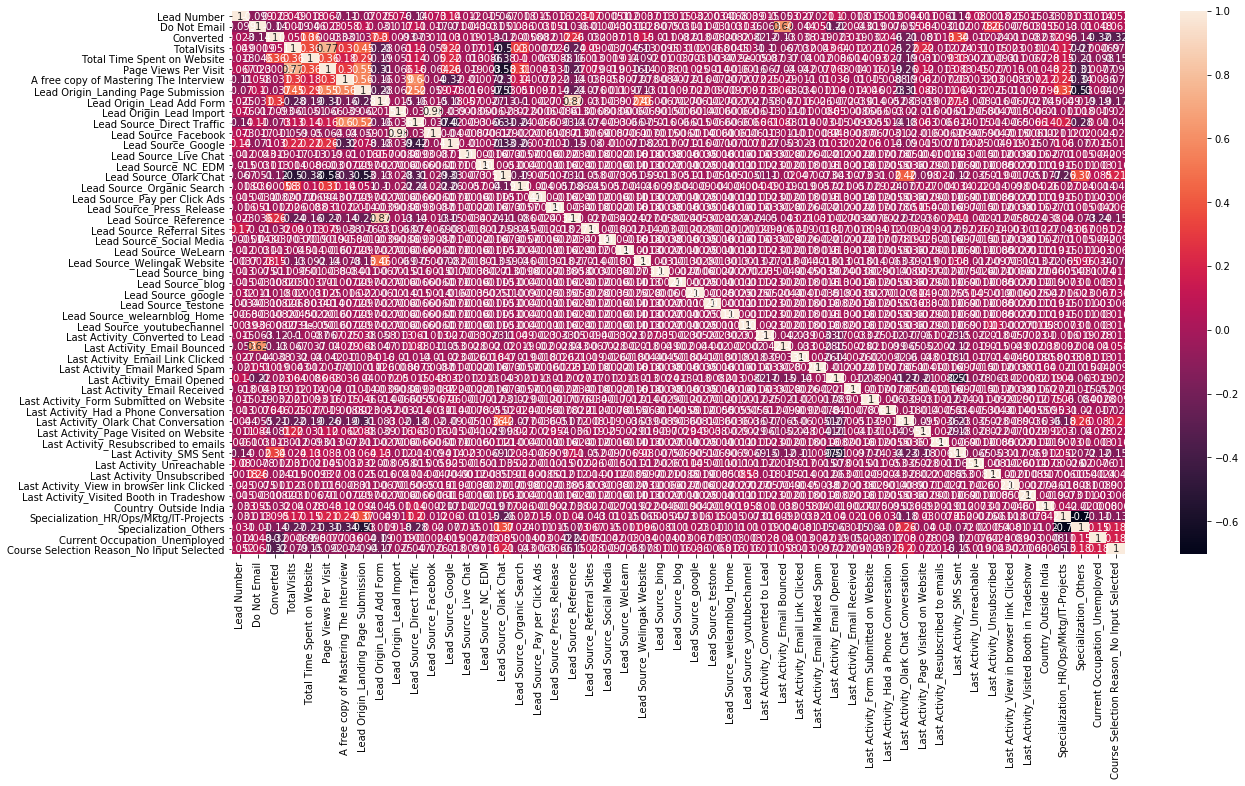

In [96]:
#Understanding correlation
plt.figure(figsize=(20,10))
sns.heatmap(leads.corr(),annot=True)
plt.show()

###### Approaching the RFE method since it is still not very conducive to deduce interpretations from the correlation matrix.

### Step8: Model Building

In [97]:
# import required library
import statsmodels.api as sm

In [98]:
# Logistic Regression model
logml=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2505.7
Date:                Mon, 07 Sep 2020   Deviance:                       5011.4
Time:                        09:36:12   Pearson chi2:                 6.21e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         28.3262   3.39e+04      0.001      0.999   -6.63e+04    6.64e+04
Do Not Email                                  -1.5398      0.222     -6.925      0.000      -1.976      -1.104
TotalVisits                                    0.3500      0.056      6.226      0.000       0.240       0.460
Total Time Spent on Website                    1.1286      0.042     27.060      0.000       1.047       1.210
Page Views Per Visit                          -0.3100      0.063     -4.891      0.000      -0.434      -0.186
A free copy of Mastering The Interview        -0.1246      0.109     -1.141      0.254      -0.339       0.089
Lead Origin_Landing Page Submission           -0.3997      0.118     -3.387      0.001      -0.631      -0.168
Lead Origin_Lead Add Form                     -0.8704      1.627     -0.535      0.593      -4.060       2.319
Lead Origin_Lead Import                       23.9940   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                    -2.8096      2.065     -1.361      0.174      -6.857       1.238
Lead Source_Facebook                         -25.8003   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                            -2.5579      2.064     -1.240      0.215      -6.602       1.486
Lead Source_Live Chat                         22.5026   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                            21.5611   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                        -1.3929      2.057     -0.677      0.498      -5.424       2.638
Lead Source_Organic Search                    -2.7664      2.067     -1.339      0.181      -6.817       1.284
Lead Source_Pay per Click Ads                -24.4783   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                    -23.1745   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                          1.4911      1.282      1.163      0.245      -1.023       4.005
Lead Source_Referral Sites                    -2.9328      2.092     -1.402      0.161      -7.032       1.167
Lead Source_Social Media                      -0.4578      2.545     -0.180      0.857      -5.446       4.530
Lead Source_WeLearn                         1.046e-09   7.56e-06      0.000      1.000   -1.48e-05    1.48e-05
Lead Source_Welingak Website                   3.6913      1.460      2.529      0.011       0.830       6.552
Lead Source_bing                              -1.9387      2.522     -0.769      0.442      -6.882       3.004
Lead Source_blog                             -23.8207   7.95e+04     -0.000      1.000

### Step9: Feature Selection using RFE

In [99]:
#import required library since statsmodel would not support RFE
from sklearn.linear_model import LogisticRegression      # running RFE with 25 variables as output
logreg=LogisticRegression()

In [100]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,25)
rfe=rfe.fit(X_train,y_train)

In [101]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True, False, False,  True,
        True, False, False,  True, False, False,  True, False, False,
       False,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
       False,  True,  True,  True])

In [102]:
#Identifying the names of the 'True' column
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
# Features that have the value '1' & 'True' shall be shortlisted

[('Do Not Email', True, 1),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 9),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 12),
 ('Lead Source_Press_Release', False, 19),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 23),
 ('Lead Source_blog', False, 15),
 ('Lead Source_google', True, 1),
 ('Lead Source_t

In [103]:
col=X_train.columns[rfe.support_] # List of features that are included by RFE. 
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Marked Spam',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'Current Occupation_Unemployed',
       'Course Selection Reason_No Input Selected'],
      dtype='object')

In [104]:
X_train.columns[~rfe.support_] # List of features that are excluded by RFE.

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Live Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Email Received', 'Last Activity_Page Visited on Website',
       'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow', 'Country_Outside India',
       'Specialization_HR/Ops/Mktg/IT-Projects'],
      dtype='object')

###### X_train[col] shall comprise of the features included by RFE and shall be taken for building the model further

##### Assessing the model with StatsModels

###### Logistic Regression Model #1 using RFE

In [105]:
#Equation for Logistic Regression Model #1
X_train_sm=sm.add_constant(X_train[col])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.3
Date:                Mon, 07 Sep 2020   Deviance:                       5082.7
Time:                        09:36:15   Pearson chi2:                 6.24e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         2.7035      0.431      6.269      0.000       1.858       3.549
Do Not Email                                 -1.6102      0.217     -7.410      0.000      -2.036      -1.184
Total Time Spent on Website                   1.1301      0.041     27.379      0.000       1.049       1.211
Lead Origin_Landing Page Submission          -0.4824      0.109     -4.411      0.000      -0.697      -0.268
Lead Origin_Lead Add Form                     0.8940      0.942      0.949      0.343      -0.953       2.741
Lead Source_Direct Traffic                   -0.9101      0.400     -2.278      0.023      -1.693      -0.127
Lead Source_Google                           -0.6059      0.394     -1.539      0.124      -1.378       0.166
Lead Source_NC_EDM                           23.1663   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                        0.5426      0.395      1.374      0.170      -0.232       1.317
Lead Source_Organic Search                   -0.8181      0.401     -2.040      0.041      -1.604      -0.032
Lead Source_Reference                         1.6613      0.919      1.807      0.071      -0.140       3.463
Lead Source_Referral Sites                   -0.9942      0.519     -1.916      0.055      -2.011       0.023
Lead Source_Welingak Website                  3.8577      1.153      3.347      0.001       1.598       6.117
Lead Source_google                          -20.9928   2.22e+04     -0.001      0.999   -4.35e+04    4.35e+04
Last Activity_Converted to Lead              -1.2475      0.225     -5.536      0.000      -1.689      -0.806
Last Activity_Email Bounced                  -0.5949      0.420     -1.416      0.157      -1.418       0.229
Last Activity_Email Marked Spam              22.4350   3.39e+04      0.001      0.999   -6.64e+04    6.64e+04
Last Activity_Form Submitted on Website      -0.7311      0.343     -2.132      0.033      -1.403      -0.059
Last Activity_Had a Phone Conversation        2.5438      0.740      3.436      0.001       1.093       3.995
Last Activity_Olark Chat Conversation        -1.4146      0.167     -8.472      0.000      -1.742      -1.087
Last Activity_Resubscribed to emails         24.5490   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                        1.2329      0.077     15.911      0.000       1.081       1.385
Last Activity_Unsubscribed                    1.2222      0.480      2.547      0.011       0.282       2.163
Specialization_Others                        -0.4773      0.087     -5.458      0.000      -0.649      -0.306
Current Occupation_Unemployed                -2.4627      0.189    -13.020      0.000      -2.833      -2.092
Cou

###### Variables with high p-value (>0.05) based on RFE Summary Statistics are:
1.  Lead Origin_Lead Add Form (p-value 0.343)
2.  Lead Source_NC_EDM (p-value 1)
3.  Lead Source_Google (p-value 0.124)
4.  Lead Source_Olark Chat (p-value 0.17)
5.  Lead Source_Reference (p-value 0.071)
6.  Lead Source_Referral Sites (p-value 0.055)
7.  Lead Source_google (p-value 0.999)
8.  Last Activity_Email Bounced (p-value 0.157)
9.  Last Activity_Email Marked Spam (p-value 0.999)
10. Last Activity_Resubscribed to emails (p-value 1)


These variables should be removed

In [106]:
col = col.drop(['Lead Source_NC_EDM','Last Activity_Resubscribed to emails','Lead Source_google'
                ,'Last Activity_Email Marked Spam','Lead Origin_Lead Add Form'
                ,'Lead Source_Olark Chat','Last Activity_Email Bounced','Lead Source_Google'
                ,'Lead Source_Reference','Lead Source_Referral Sites'],1)

###### Logistic Regression Model #2 using RFE

In [107]:
#Equation
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.1
Date:                Mon, 07 Sep 2020   Deviance:                       5374.2
Time:                        09:36:15   Pearson chi2:                 5.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         3.1165      0.196     15.921      0.000       2.733       3.500
Do Not Email                                 -1.6226      0.180     -9.017      0.000      -1.975      -1.270
Total Time Spent on Website                   0.9442      0.037     25.362      0.000       0.871       1.017
Lead Origin_Landing Page Submission          -1.1822      0.097    -12.195      0.000      -1.372      -0.992
Lead Source_Direct Traffic                   -0.4491      0.092     -4.886      0.000      -0.629      -0.269
Lead Source_Organic Search                   -0.5746      0.107     -5.358      0.000      -0.785      -0.364
Lead Source_Welingak Website                  4.3762      0.725      6.036      0.000       2.955       5.797
Last Activity_Converted to Lead              -1.4207      0.220     -6.457      0.000      -1.852      -0.989
Last Activity_Form Submitted on Website      -0.7702      0.326     -2.360      0.018      -1.410      -0.130
Last Activity_Had a Phone Conversation        2.2387      0.736      3.042      0.002       0.796       3.681
Last Activity_Olark Chat Conversation        -1.4603      0.165     -8.836      0.000      -1.784      -1.136
Last Activity_SMS Sent                        1.2793      0.074     17.305      0.000       1.134       1.424
Last Activity_Unsubscribed                    1.1547      0.452      2.555      0.011       0.269       2.040
Specialization_Others                        -0.6525      0.083     -7.851      0.000      -0.815      -0.490
Current Occupation_Unemployed                -2.5493      0.183    -13.940      0.000      -2.908      -2.191
Course Selection Reason_No Input Selected    -1.3810      0.087    -15.879      0.000      -1.551      -1.211
=============================================================================================================
"""

In [108]:
# Getting the predicted values on the train set. This signifies the probability of getting a score of 1
y_train_pred=res.predict(X_train_sm)
y_train_pred[:15]

3009    0.069367
1012    0.064113
9226    0.587798
4750    0.595270
7987    0.892853
1281    0.821985
2880    0.055819
4971    0.952195
7536    0.821058
1248    0.877557
1429    0.221623
2178    0.076238
8554    0.159902
5044    0.587798
3475    0.947206
dtype: float64

###### Creating dataframe with actual conversions and the predicted probabilities 

In [109]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Conversion_probability':y_train_pred})
y_train_pred_final['Lead Number']=y_train.index
y_train_pred_final.head()

,Converted,Conversion_probability,Lead Number
3009,0,0.069367,3009
1012,0,0.064113,1012
9226,0,0.587798,9226
4750,1,0.595270,4750
7987,1,0.892853,7987


#### Creating new column 'conversion_prediction' with 1 if Conversion_Probability>0.4 else 0

In [110]:
y_train_pred_final['conversion_prediction']=y_train_pred_final.Conversion_probability.map(lambda x:1 if x>0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_probability,Lead Number,conversion_prediction
3009,0,0.069367,3009,0
1012,0,0.064113,1012,0
9226,0,0.587798,9226,1
4750,1,0.595270,4750,1
7987,1,0.892853,7987,1


#### Verifying accuracy of the model prediction using RFE

### Step10: Confusion Matrix to verify accuracy of prediction 

In [111]:
from sklearn import metrics

In [112]:
#Confusion Matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.conversion_prediction)
confusion

array([[3170,  735],
       [ 550, 1896]], dtype=int64)

###### Predicted            Converted            Not Converted
###### Actual                                          
###### Converted                     3170                       735
######  Not Converted             550                        1896

In [113]:
#Computing the model accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.conversion_prediction))

0.7976696583215241


### Step11: Manual Feature Elimination using VIF

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
#Create dataframe that includes names of all varaibles and their respective VIFs (Checking VIF 1st time)
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
13,Current Occupation_Unemployed,5.85
2,Lead Origin_Landing Page Submission,3.90
12,Specialization_Others,2.81
3,Lead Source_Direct Traffic,2.13
14,Course Selection Reason_No Input Selected,1.59
10,Last Activity_SMS Sent,1.51
9,Last Activity_Olark Chat Conversation,1.36
4,Lead Source_Organic Search,1.31
0,Do Not Email,1.21
1,Total Time Spent on Website,1.15


In [116]:
# Dropping feature 'Current Occupation_Unemployed' since it has VIF>5
col=col.drop('Current Occupation_Unemployed',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'Course Selection Reason_No Input Selected'],
      dtype='object')

###### Reiterating model building. Logistic Regression Model #3 using VIF

In [117]:
#Equation
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2837.3
Date:                Mon, 07 Sep 2020   Deviance:                       5674.6
Time:                        09:36:16   Pearson chi2:                 6.08e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.8929      0.085     10.523      0.000       0.727       1.059
Do Not Email                                 -1.6359      0.172     -9.490      0.000      -1.974      -1.298
Total Time Spent on Website                   0.9505      0.037     25.955      0.000       0.879       1.022
Lead Origin_Landing Page Submission          -1.2722      0.093    -13.674      0.000      -1.455      -1.090
Lead Source_Direct Traffic                   -0.4666      0.089     -5.224      0.000      -0.642      -0.292
Lead Source_Organic Search                   -0.5718      0.104     -5.507      0.000      -0.775      -0.368
Lead Source_Welingak Website                  4.2024      0.725      5.794      0.000       2.781       5.624
Last Activity_Converted to Lead              -1.3667      0.210     -6.507      0.000      -1.778      -0.955
Last Activity_Form Submitted on Website      -0.7682      0.319     -2.407      0.016      -1.394      -0.143
Last Activity_Had a Phone Conversation        2.1018      0.734      2.865      0.004       0.664       3.540
Last Activity_Olark Chat Conversation        -1.5306      0.162     -9.475      0.000      -1.847      -1.214
Last Activity_SMS Sent                        1.2986      0.072     18.118      0.000       1.158       1.439
Last Activity_Unsubscribed                    1.2288      0.421      2.921      0.003       0.404       2.053
Specialization_Others                        -0.8046      0.079    -10.199      0.000      -0.959      -0.650
Course Selection Reason_No Input Selected    -1.5743      0.087    -18.199      0.000      -1.744      -1.405
=============================================================================================================
"""

In [118]:
#Assessing if vital information is lost beacuse a feature is dropped
y_train_pred=res.predict(X_train_sm).values.reshape(-1)

In [119]:
y_train_pred[:10]

array([0.07092577, 0.00461377, 0.63232024, 0.60834421, 0.91454769,
       0.85700866, 0.05779317, 0.96070427, 0.85309017, 0.90192008])

#### Checking 'conversion_prediction' with 1 if Conversion_Probability>0.4 else 0

In [120]:
y_train_pred_final['conversion_prediction']=y_train_pred_final.Conversion_probability.map(lambda x:1 if x>0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_probability,Lead Number,conversion_prediction
3009,0,0.069367,3009,0
1012,0,0.064113,1012,0
9226,0,0.587798,9226,1
4750,1,0.595270,4750,1
7987,1,0.892853,7987,1


In [121]:
#Computing the model accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.conversion_prediction))
#Model accuracy is not impacted with the dropping of the feature

0.7976696583215241


In [122]:
#Create dataframe that includes names of all varaibles and their respective VIFs (Checking VIF 2nd time)
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,Lead Origin_Landing Page Submission,2.67
3,Lead Source_Direct Traffic,2.12
12,Specialization_Others,1.81
13,Course Selection Reason_No Input Selected,1.52
10,Last Activity_SMS Sent,1.44
9,Last Activity_Olark Chat Conversation,1.30
4,Lead Source_Organic Search,1.29
0,Do Not Email,1.21
1,Total Time Spent on Website,1.14
6,Last Activity_Converted to Lead,1.10


###### No feature has a VIF>5
###### Reiterating model building. Logistic Regression Model #4 using VIF

In [123]:
#Equation
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2837.3
Date:                Mon, 07 Sep 2020   Deviance:                       5674.6
Time:                        09:36:16   Pearson chi2:                 6.08e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.8929      0.085     10.523      0.000       0.727       1.059
Do Not Email                                 -1.6359      0.172     -9.490      0.000      -1.974      -1.298
Total Time Spent on Website                   0.9505      0.037     25.955      0.000       0.879       1.022
Lead Origin_Landing Page Submission          -1.2722      0.093    -13.674      0.000      -1.455      -1.090
Lead Source_Direct Traffic                   -0.4666      0.089     -5.224      0.000      -0.642      -0.292
Lead Source_Organic Search                   -0.5718      0.104     -5.507      0.000      -0.775      -0.368
Lead Source_Welingak Website                  4.2024      0.725      5.794      0.000       2.781       5.624
Last Activity_Converted to Lead              -1.3667      0.210     -6.507      0.000      -1.778      -0.955
Last Activity_Form Submitted on Website      -0.7682      0.319     -2.407      0.016      -1.394      -0.143
Last Activity_Had a Phone Conversation        2.1018      0.734      2.865      0.004       0.664       3.540
Last Activity_Olark Chat Conversation        -1.5306      0.162     -9.475      0.000      -1.847      -1.214
Last Activity_SMS Sent                        1.2986      0.072     18.118      0.000       1.158       1.439
Last Activity_Unsubscribed                    1.2288      0.421      2.921      0.003       0.404       2.053
Specialization_Others                        -0.8046      0.079    -10.199      0.000      -0.959      -0.650
Course Selection Reason_No Input Selected    -1.5743      0.087    -18.199      0.000      -1.744      -1.405
=============================================================================================================
"""

In [124]:
#Feature 'Last Activity_Form Submitted on Website' has a high p-value of 0.16. Hence dropping the feature
col=col.drop('Last Activity_Form Submitted on Website',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'Course Selection Reason_No Input Selected'],
      dtype='object')

In [125]:
#Assessing if vital information is lost beacuse a feature is dropped
y_train_pred=res.predict(X_train_sm).values.reshape(-1)

In [126]:
y_train_pred[:10]

array([0.07092577, 0.00461377, 0.63232024, 0.60834421, 0.91454769,
       0.85700866, 0.05779317, 0.96070427, 0.85309017, 0.90192008])

#### Checking 'conversion_prediction' with 1 if Conversion_Probability>0.4 else 0

In [127]:
y_train_pred_final['conversion_prediction']=y_train_pred_final.Conversion_probability.map(lambda x:1 if x>0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_probability,Lead Number,conversion_prediction
3009,0,0.069367,3009,0
1012,0,0.064113,1012,0
9226,0,0.587798,9226,1
4750,1,0.595270,4750,1
7987,1,0.892853,7987,1


In [128]:
#Computing the model accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.conversion_prediction))
#Model accuracy is not impacted with the dropping of the feature

0.7976696583215241


In [129]:
#Exporting train set to local computer 
y_train_pred_final.to_csv(r"C:\Users\ashek\OneDrive\Desktop\IIITB-upGrad\Course4-Machine Learning\Lead Score Case Study\conversion_prediction.csv",index=False)


In [130]:
#Create dataframe that includes names of all varaibles and their respective VIFs (Checking VIF 3rd time)
vif=pd.DataFrame()
vif['features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i)for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,Lead Origin_Landing Page Submission,2.64
3,Lead Source_Direct Traffic,2.12
11,Specialization_Others,1.81
12,Course Selection Reason_No Input Selected,1.51
9,Last Activity_SMS Sent,1.44
8,Last Activity_Olark Chat Conversation,1.30
4,Lead Source_Organic Search,1.29
0,Do Not Email,1.21
1,Total Time Spent on Website,1.14
6,Last Activity_Converted to Lead,1.09


###### No feature has a VIF>5
###### Reiterating model building. Logistic Regression Model #5 using VIF

In [131]:
#Equation
X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2840.4
Date:                Mon, 07 Sep 2020   Deviance:                       5680.9
Time:                        09:36:17   Pearson chi2:                 6.08e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.8707      0.084     10.332      0.000       0.706       1.036
Do Not Email                                 -1.6320      0.172     -9.465      0.000      -1.970      -1.294
Total Time Spent on Website                   0.9491      0.037     25.938      0.000       0.877       1.021
Lead Origin_Landing Page Submission          -1.2753      0.093    -13.726      0.000      -1.457      -1.093
Lead Source_Direct Traffic                   -0.4598      0.089     -5.158      0.000      -0.634      -0.285
Lead Source_Organic Search                   -0.5598      0.104     -5.397      0.000      -0.763      -0.357
Lead Source_Welingak Website                  4.2060      0.725      5.799      0.000       2.784       5.627
Last Activity_Converted to Lead              -1.3511      0.210     -6.438      0.000      -1.762      -0.940
Last Activity_Had a Phone Conversation        2.1187      0.734      2.886      0.004       0.680       3.558
Last Activity_Olark Chat Conversation        -1.5167      0.161     -9.398      0.000      -1.833      -1.200
Last Activity_SMS Sent                        1.3141      0.071     18.399      0.000       1.174       1.454
Last Activity_Unsubscribed                    1.2413      0.420      2.952      0.003       0.417       2.065
Specialization_Others                        -0.7943      0.079    -10.092      0.000      -0.949      -0.640
Course Selection Reason_No Input Selected    -1.5763      0.086    -18.230      0.000      -1.746      -1.407
=============================================================================================================
"""

###### None of the features have a high p-value. Hence all of these features are significant.  

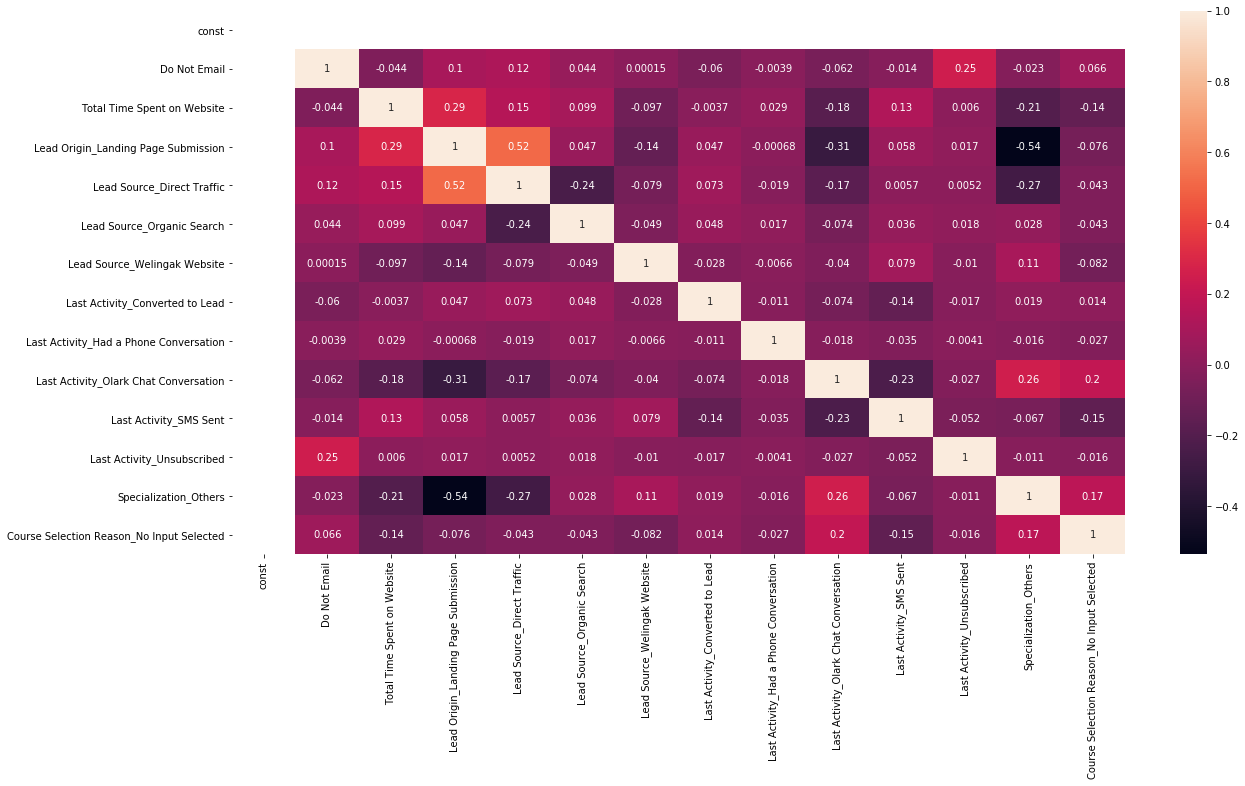

In [132]:
#Understanding correlation
plt.figure(figsize=(20,10))
sns.heatmap(X_train_sm.corr(),annot=True)
plt.show()

### Step:12 Metrics to confirm goodness of the model by verifying metrics beyond accuracy: Sensitivity & Specificity

In [133]:
#Confusion Matrix again
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.conversion_prediction)
confusion

array([[3170,  735],
       [ 550, 1896]], dtype=int64)

In [134]:
###### Other elements of Confusion Matrix beyond accuracy to assess the model performance:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Rate of sensitivity of the logistic regression model i.e.;
# of the total convertible leads how many are accurately classified as convertible leads or how well '1s' are identified
TP/float(TP+FN)

0.7751430907604252

In [136]:
# Rate of specificity of the logistic regression model i.e.; 
# of the total non-convertible leads how many are accurately classified as non-convertible leads or how well '0s' are identified
TN/float(TN+FP)

0.8117797695262484

In [137]:
#False Positive Rate
# i.e.; incorrectly classifying a lead as convertible while it is actually not convertible 
# or rate at which a '0' is classified as a '1'
print(FP/float(TN+FP))

0.1882202304737516


In [138]:
# Positive Predictive Rate
# i.e.; correctly classifying a lead as convertible while it is actually convertible
# or rate at which a '1' is classified as a '1'
print(TP/float(TP+FP))

0.7206385404789054


In [139]:
# Negative Predictive Rate i.e.; correctly classifying a lead as inconvertible while it is actually inconvertible
# or rate at which a '0' is classified as a '0'
print(TN/float(TN+FN))

0.8521505376344086


### Step13: Plotting ROC Curve

An ROC Curve demostrates:
1. Relation between sensitivity and specificity(both should be inversely proportional to each other).
2. Model accuracy is directly proportional to the shifting of the ROC curve to the top-left border of the ROC space.
3. Test accurcay is inversely proportional to the closeness of the ROC curve to the 45-degree of ROC space  

In [140]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [141]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,y_train_pred_final.Conversion_probability, drop_intermediate = False )

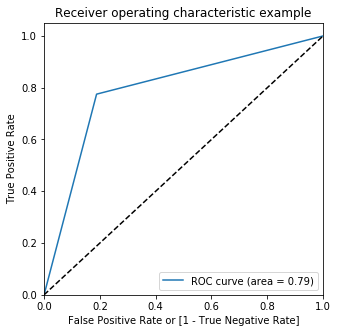

In [142]:
# Calling the ROC function
draw_roc(y_train_pred_final.Converted,y_train_pred_final.conversion_prediction)

### Step14: Finding Optimal Cutoff Point

In [143]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_probability,Lead Number,conversion_prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.069367,3009,0,1,0,0,0,0,0,0,0,0,0
1012,0,0.064113,1012,0,1,0,0,0,0,0,0,0,0,0
9226,0,0.587798,9226,1,1,1,1,1,1,1,0,0,0,0
4750,1,0.595270,4750,1,1,1,1,1,1,1,0,0,0,0
7987,1,0.892853,7987,1,1,1,1,1,1,1,1,1,1,0


In [144]:
#Plotting the accuracy, sensitivity, & specificity
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.632499,0.975061,0.417926
0.2,0.2,0.725398,0.930908,0.596671
0.3,0.3,0.772949,0.825429,0.740077
0.4,0.4,0.797670,0.775143,0.811780
0.5,0.5,0.798614,0.685200,0.869654
0.6,0.6,0.779720,0.558463,0.918310
0.7,0.7,0.767753,0.482829,0.946223
0.8,0.8,0.743033,0.377760,0.971831
0.9,0.9,0.709495,0.259199,0.991549


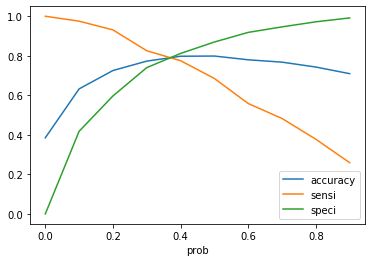

In [145]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 can be taken as the optimum cutoff probability. The accurcay at this point is 77%, sensitivity is 83%, and specificity at 81%

### Step 15: Precision- To confirm that a predicted 'Yes' is actually a 'Yes'   

In [146]:
#Confusion Matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.conversion_prediction)
confusion

array([[3170,  735],
       [ 550, 1896]], dtype=int64)

###### Precision = TP / TP + FP

In [147]:
confusion[1,1]/(confusion[1,1]+confusion[0,1])

0.7206385404789054

In [148]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7751430907604252

###### Using sklearn utilities

In [149]:
from sklearn.metrics import precision_score, recall_score

In [150]:
precision_score(y_train_pred_final.Converted,y_train_pred_final.conversion_prediction)

0.7206385404789054

In [151]:
recall_score(y_train_pred_final.Converted,y_train_pred_final.conversion_prediction)

0.7751430907604252

#### Precision & Recall Trade-off

In [152]:
from sklearn.metrics import precision_recall_curve

In [153]:
y_train_pred_final.Converted,y_train_pred_final.conversion_prediction

(3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    0
 7077    0
 5754    0
 Name: Converted, Length: 6351, dtype: int64,
 3009    0
 1012    0
 9226    1
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    1
 7077    0
 5754    1
 Name: conversion_prediction, Length: 6351, dtype: int64)

In [154]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_probability)

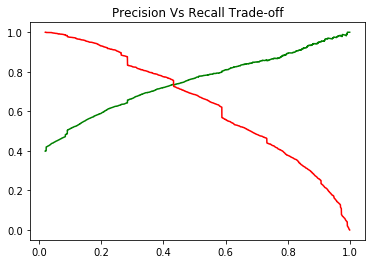

In [155]:
plt.plot(thresholds,p[:-1],'g')
plt.plot(thresholds,r[:-1],'r')
plt.title('Precision Vs Recall Trade-off')

plt.show()

### Step17: Treating the model on the test set

##### 17.1 Feature Scaling

In [156]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Outside India,Specialization_HR/Ops/Mktg/IT-Projects,Specialization_Others,Current Occupation_Unemployed,Course Selection Reason_No Input Selected
3271,0,0.284772,-0.600595,0.955505,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1490,0,0.643547,1.887326,1.510766,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7936,0,-0.432779,-0.752879,-0.155018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4216,0,-1.150329,-0.888650,-1.265540,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3830,0,1.719873,-0.587751,2.066027,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [157]:
X_test=X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others,Course Selection Reason_No Input Selected
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,1,1
1490,0,1.887326,1,1,0,0,0,0,0,0,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,1,1
4216,0,-0.888650,0,0,0,0,0,0,0,0,0,0,0
3830,0,-0.587751,1,0,1,0,0,0,0,0,0,1,1


In [158]:
#Adding constant to test set
X_test_sm=sm.add_constant(X_test)

##### Make predictions on the test set for the variable y_test_pred

In [159]:
# Applying predictions of test set in the variable y_test_pred
y_test_pred=res.predict(X_test_sm)
y_test_pred[:15]

3271    0.112060
1490    0.716444
7936    0.098465
4216    0.506828
3830    0.019982
1800    0.246825
6507    0.572177
4821    0.372820
4223    0.633456
4714    0.263242
3977    0.724467
4209    0.020634
2320    0.082322
3744    0.092482
2570    0.792716
dtype: float64

In [160]:
# Storing y_test_pred in dataframe named y_pred_df
y_pred_df=pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
3271,0.112060
1490,0.716444
7936,0.098465
4216,0.506828
3830,0.019982


In [161]:
# Creating y_test set to dataframe
y_test_df=pd.DataFrame(y_test)

In [162]:
#Adding 'Lead Number' to y_test_df
y_test_df['Lead Number']=y_test_df.index

In [163]:
#Removing index from both the dataframes to append them side by side
y_test_df.reset_index(drop=True,inplace=True)
y_pred_df.reset_index(drop=True,inplace=True)

In [164]:
#Appending y_test_df & y_pred_df into y_pred_final
y_pred_final=pd.concat([y_test_df,y_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.112060
1,1,1490,0.716444
2,0,7936,0.098465
3,1,4216,0.506828
4,0,3830,0.019982


In [165]:
#Renaming the column '0' & rearranging the columns
y_pred_final.rename(columns={0:'Conversion_Probability'})
y_pred_final.columns=['Converted','Lead Number','Conversion_probability']
y_pred_final.head()

,Converted,Lead Number,Conversion_probability
0,0,3271,0.112060
1,1,1490,0.716444
2,0,7936,0.098465
3,1,4216,0.506828
4,0,3830,0.019982


#### Applying the cutoff of 0.3 so computed using Confusion Matrix thresholds

In [166]:
y_pred_final['testset_conversion_prediction']=y_pred_final.Conversion_probability.map(lambda x:1 if x>0.3 else 0)
y_pred_final.head()

,Converted,Lead Number,Conversion_probability,testset_conversion_prediction
0,0,3271,0.112060,0
1,1,1490,0.716444,1
2,0,7936,0.098465,0
3,1,4216,0.506828,1
4,0,3830,0.019982,0


In [167]:
#Assessing accuracy & evaluating other elements of confusion matrix
metrics.accuracy_score(y_pred_final.Converted,y_pred_final.testset_conversion_prediction)

0.7517443995593096

Accuracy computed on the trains data set is 79.7% while that for the test data set is 75.2%. This is an expected behavior since the test set is not a too familiar set at the moment. 

In [168]:
#Confusion Matrix
test_confusion=metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.testset_conversion_prediction)
test_confusion

array([[1206,  528],
       [ 148,  841]], dtype=int64)

In [169]:
#Evaluating other elements of confusion matrix
TP = test_confusion[1,1] # true positive 
TN = test_confusion[0,0] # true negatives
FP = test_confusion[0,1] # false positives
FN = test_confusion[1,0] # false negatives

In [170]:
# Rate of sensitivity=how well are actual '1s' accurately predicted. Sensitivity for train set=77.5%
TP/float(TP+FN)

0.8503538928210314

In [171]:
# Rate of specificity=how well are actual'0s' accurately predicted. Specificity for train set=81.1%
TN/float(TN+FP)

0.6955017301038062

In [172]:
#False Positive Rate= rate at which a '0' is classified as a '1'.FPR for train set is 18.8%
FP/float(TN+FP)

0.3044982698961938

In [173]:
# Positive Predictive Rate= rate at which a '1' is classified as a '1'.PPR for train set is 72.2%
TP/float(TP+FP)

0.6143170197224251

In [174]:
# Negative Predictive Rate= or rate at which a '0' is classified as a '0'.NPR for train set is 85.2%
print(TN/float(TN+FN))

0.8906942392909897


In [175]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [176]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted,y_pred_final.Conversion_probability, drop_intermediate = False )

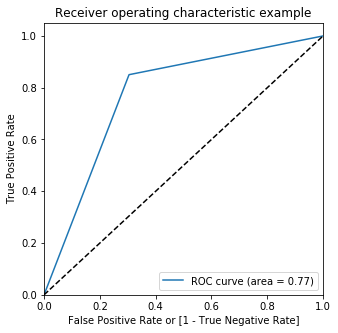

In [177]:
# Calling the ROC function
draw_roc(y_pred_final.Converted,y_pred_final.testset_conversion_prediction)

##### Precision (TP / (TP + FP)) & Recall (TP/(TP+FN)) on Test Set

In [178]:
#Precision. Precision for train set is 72%
test_confusion[1,1]/(test_confusion[1,1]+test_confusion[0,1])

0.6143170197224251

In [179]:
#Recall.Recall for train set is 77%
test_confusion[1,1]/(test_confusion[1,0]+test_confusion[1,1])

0.8503538928210314

##### Precision & Recall Trade-off on Test Set

In [180]:
y_pred_final.Converted,y_pred_final.testset_conversion_prediction

(0       0
 1       1
 2       0
 3       1
 4       0
        ..
 2718    0
 2719    0
 2720    1
 2721    0
 2722    0
 Name: Converted, Length: 2723, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 2718    0
 2719    0
 2720    1
 2721    0
 2722    0
 Name: testset_conversion_prediction, Length: 2723, dtype: int64)

In [181]:
p,r,thresholds=precision_recall_curve(y_pred_final.Converted,y_pred_final.Conversion_probability)

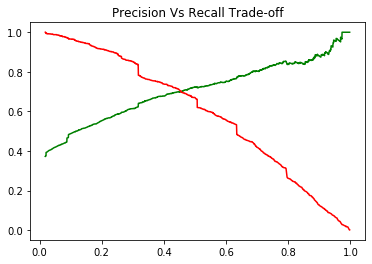

In [182]:
plt.plot(thresholds,p[:-1],'g')
plt.plot(thresholds,r[:-1],'r')
plt.title('Precision Vs Recall Trade-off')

plt.show()

### Final Observations

##### Train Set                               Vs                       Test Set
1.      Accuracy:79.7%                    Accuracy: 75.2%
2.      Sensitivity: 77.5%                Sensitivity: 85.5%
3.      Specificity: 81.1%                Specificity: 69.5%
4.      False Positive Rate: 18.8%        False Positive Rate: 30.5%
5.      Positive Predictive Rate: 72.4%   Positive Predictive Rate: 61.4%
6.      Negative Predictive rate: 85.2%   Negative Predictive rate: 89.0%
7.      Precision: 72%                    Precision: 61%
8.      Recall: 77%                       Recall: 85%

In [183]:
#Exporting test set to local computer 
y_pred_final.to_csv(r"C:\Users\ashek\OneDrive\Desktop\IIITB-upGrad\Course4-Machine Learning\Lead Score Case Study\test_conversion_prediction1.csv",index=False)


#  -----------------Logistic Regression Model----------------------- 